In [1]:
# imports
import pandas as pd

# Billboard Song Prediction Project

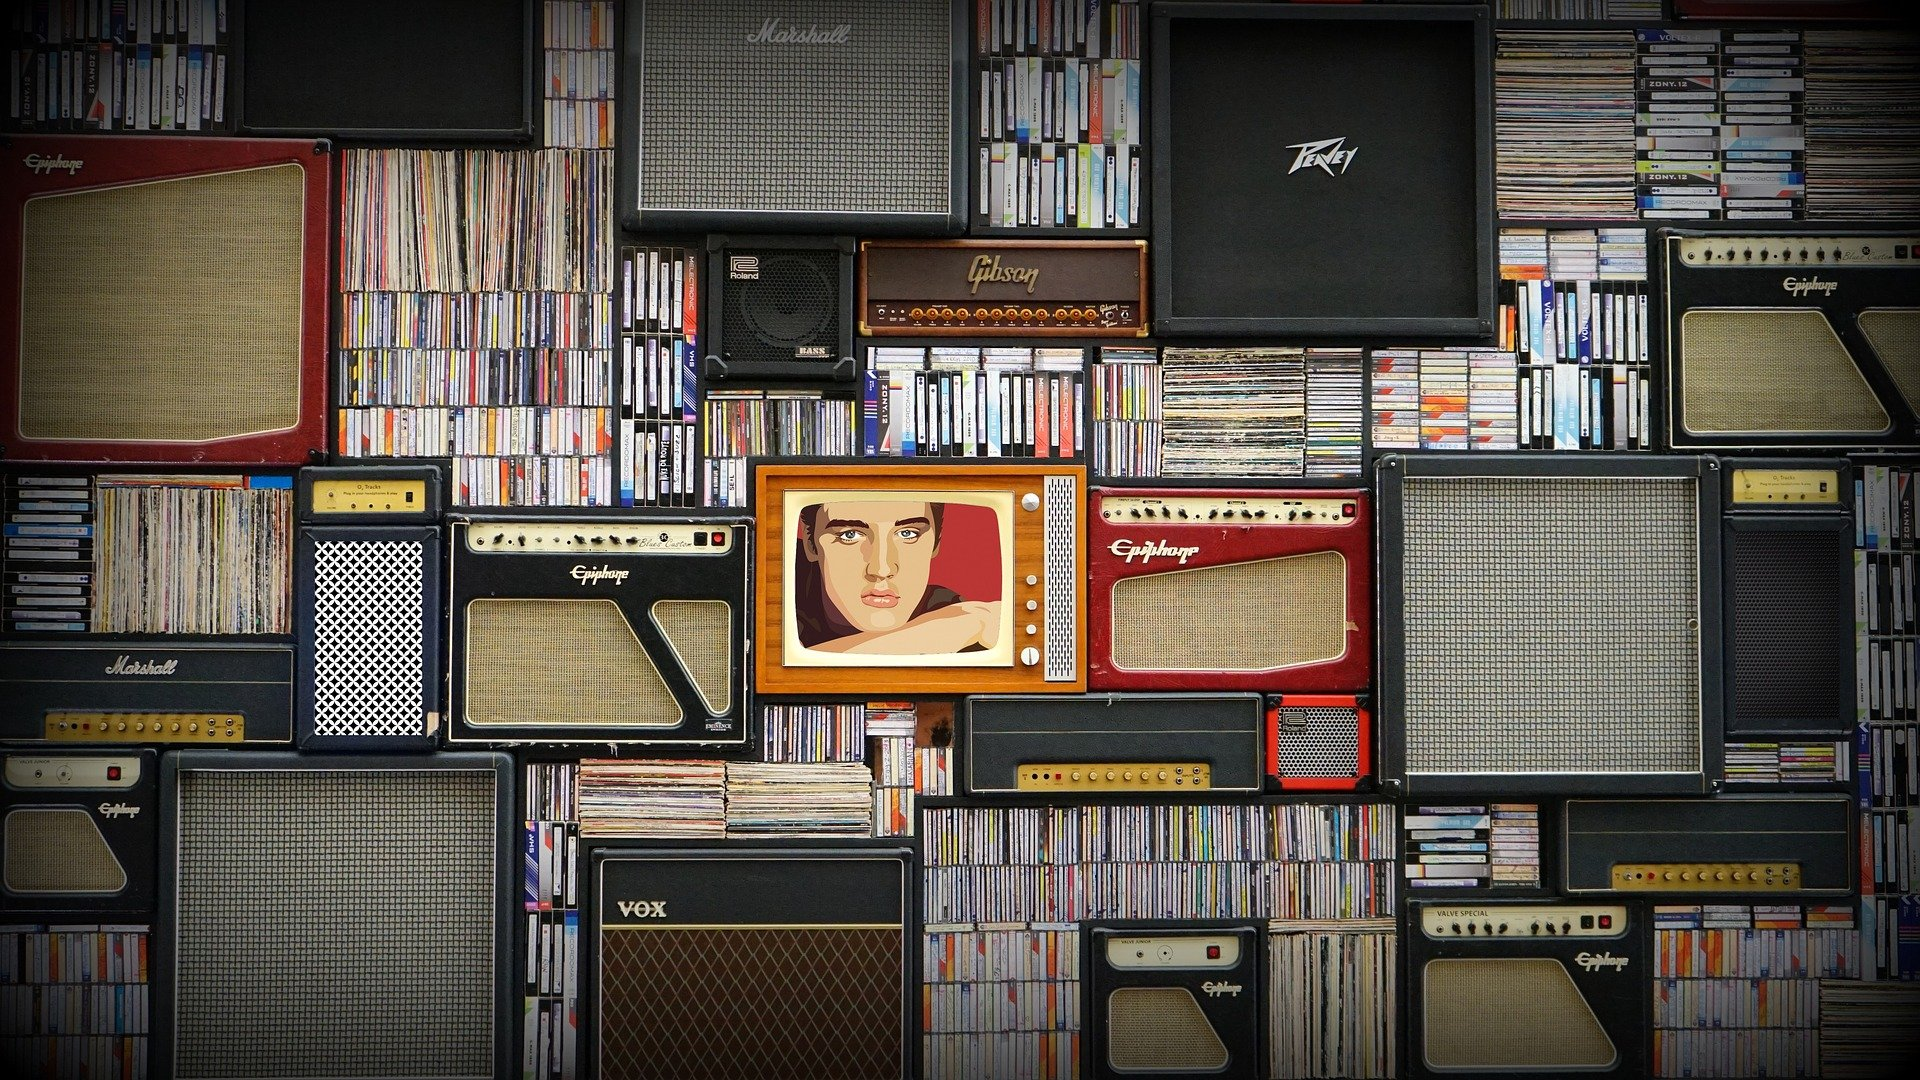

In [1]:
from IPython.display import Image
Image(filename='../../images/presentationCoverImage.jpg', width=1000, height=600)

### Teammates: Sarah D. Hood, Jini Hassan, Ryan Eccleston-Murdock, Wasif Khan, Angeli Lucila, Ivana Korak

### Obtaining Data: CSVs

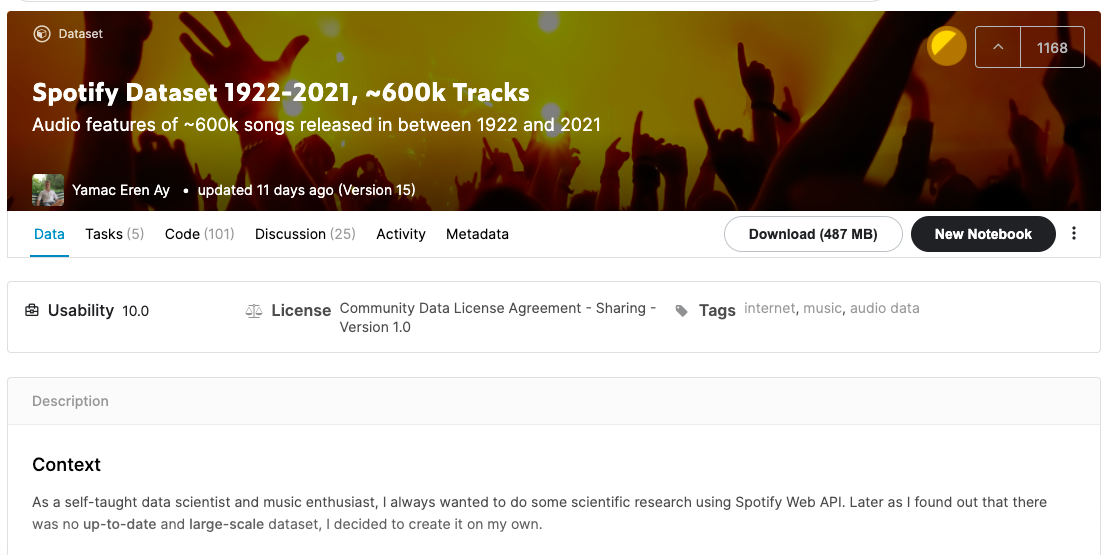

In [3]:
Image(filename='../../images/spotifyto2020.png', width=1000, height=500)

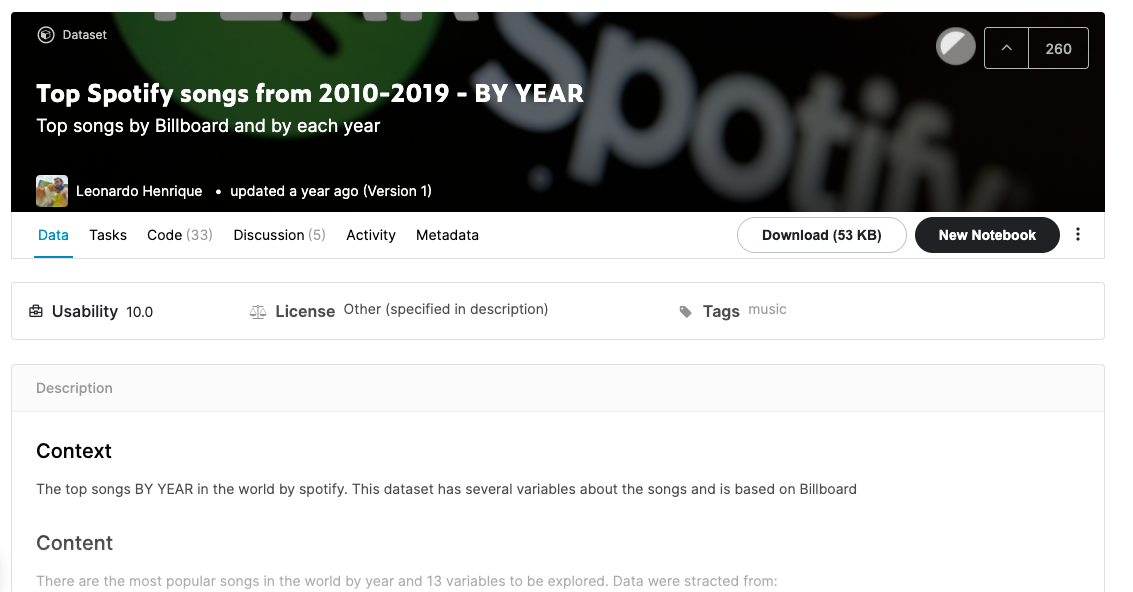

In [17]:
Image(filename='../../images/hitsInitialDataset.png', width=1000, height=500)

### Obtaining Data: Scraping

In [ ]:
counter = 0
billboard_info_list = []
# iterating over the number of weeks so far in 2021
for counter in range(0, 18):
    # set up soup obj
    html = browser.html
    soup = BeautifulSoup(html, 'html.parser')
    # find the area with the date of the chart rankings
    date_section = soup.find('div', class_='chart-detail-header__select-date')
    span_section = date_section.find('span')
    button = span_section.find('button')
    this_date = button.text
    # each page has 5 divs holding info for 20 songs: iterate over each div and extract track info
    for item in soup.find_all('div', class_='chart-details__left-rail'):
        list_item = item.find_all('div', class_='chart-list-item')
        for s in list_item:
            list_rank = s.get('data-rank')
            list_artist = s.get('data-artist')
            list_title = s.get('data-title')
            billboard_info_list.append({'date': this_date, 'rank': list_rank, 'artist': list_artist, 'title': list_title})
    # find the 'Next week' button in the date area, and save it as the link for getting to next page
    for l in span_section.find('label').find('ul').find_all('a'):
        if 'Next Week' in l.text:
            partial_link = l['href']
    # open the menu to get the next week
    browser.find_by_css('span.chart-detail-header__date-selector').first.click()
    # clicking on the link to the next week
    try:
        print(partial_link)
        browser.click_link_by_partial_href(partial_link)
        sleep(randint(3,10))
    except AttributeError as e:
        print(e)   
#     increment the counter
    counter +=1

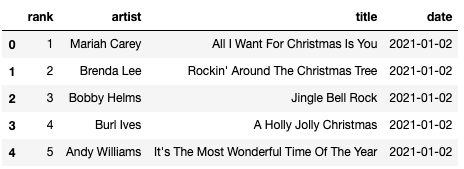

In [21]:
Image(filename='../../images/scrapingDF.png', width=700, height=600)

![scraping results](../../images/scrapingDF.png)

### Reading in and Pre-Processing the Source CSVs

In [4]:
# read in billboard 2018-2020 data
path = '../data/billboardSongsWeekly.csv'
billboard_df = pd.read_csv(path)
billboard_df.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1963-0...,6/1/1963,11,Still,Bill Anderson,StillBill Anderson,1.0,17.0,11.0,8.0
1,http://www.billboard.com/charts/hot-100/1967-0...,1/7/1967,11,Coming Home Soldier,Bobby Vinton,Coming Home SoldierBobby Vinton,1.0,17.0,11.0,8.0
2,http://www.billboard.com/charts/hot-100/1971-0...,7/3/1971,11,She's Not Just Another Woman,The 8th Day,She's Not Just Another WomanThe 8th Day,1.0,17.0,11.0,8.0
3,http://www.billboard.com/charts/hot-100/1975-1...,11/29/1975,11,Saturday Night,Bay City Rollers,Saturday NightBay City Rollers,1.0,17.0,11.0,8.0
4,http://www.billboard.com/charts/hot-100/1979-0...,9/29/1979,11,Pop Muzik,M,Pop MuzikM,1.0,17.0,11.0,8.0


In [5]:
# checking for null values
billboard_df.isnull().sum()

url                           0
WeekID                        0
Week Position                 0
Song                          0
Performer                     0
SongID                        0
Instance                   5200
Previous Week Position    35984
Peak Position              5200
Weeks on Chart             5200
dtype: int64

In [6]:
# checking to see range of instance values
billboard_df['Instance'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., nan,  9.])

In [7]:
# replacing nans with 0
billboard_df = billboard_df.fillna(0)

In [8]:
# re-checking for null values
billboard_df.isnull().sum()

url                       0
WeekID                    0
Week Position             0
Song                      0
Performer                 0
SongID                    0
Instance                  0
Previous Week Position    0
Peak Position             0
Weeks on Chart            0
dtype: int64

In [9]:
# change weekid col to datetime
billboard_df["WeekID"] = pd.to_datetime(billboard_df["WeekID"])

In [10]:
# changing unnecessary floats to integers
billboard_df = billboard_df.astype(
    {"Instance": int, "Previous Week Position": int, "Peak Position": int, "Weeks on Chart": int}
)

In [11]:
# checking data types
billboard_df.dtypes

url                               object
WeekID                    datetime64[ns]
Week Position                      int64
Song                              object
Performer                         object
SongID                            object
Instance                           int64
Previous Week Position             int64
Peak Position                      int64
Weeks on Chart                     int64
dtype: object

In [12]:
# removing data from before 2018
bb_subset = billboard_df[billboard_df['WeekID'].dt.date.astype(str) >= '2017-12-31']
bb_subset.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
17,https://www.billboard.com/charts/hot-100/2019-...,2019-12-07,11,Dance Monkey,Tones And I,Dance MonkeyTones And I,1,19,11,8
28,https://www.billboard.com/charts/hot-100/2018-...,2018-04-07,12,Pray For Me,The Weeknd & Kendrick Lamar,Pray For MeThe Weeknd & Kendrick Lamar,1,10,7,8
322,https://www.billboard.com/charts/hot-100/2019-...,2019-12-07,55,Into The Unknown,Idina Menzel & AURORA,Into The UnknownIdina Menzel & AURORA,1,0,55,1
373,https://www.billboard.com/charts/hot-100/2018-...,2018-02-03,56,Mine,Bazzi,MineBazzi,1,0,56,1
374,https://www.billboard.com/charts/hot-100/2018-...,2018-03-24,56,Indica Badu,Logic Featuring Wiz Khalifa,Indica BaduLogic Featuring Wiz Khalifa,1,0,56,1


In [13]:
# checking shape of df
bb_subset.shape

(15600, 10)

In [14]:
# reset index
bb_subset = bb_subset.reset_index(drop=True)
bb_subset.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,https://www.billboard.com/charts/hot-100/2019-...,2019-12-07,11,Dance Monkey,Tones And I,Dance MonkeyTones And I,1,19,11,8
1,https://www.billboard.com/charts/hot-100/2018-...,2018-04-07,12,Pray For Me,The Weeknd & Kendrick Lamar,Pray For MeThe Weeknd & Kendrick Lamar,1,10,7,8
2,https://www.billboard.com/charts/hot-100/2019-...,2019-12-07,55,Into The Unknown,Idina Menzel & AURORA,Into The UnknownIdina Menzel & AURORA,1,0,55,1
3,https://www.billboard.com/charts/hot-100/2018-...,2018-02-03,56,Mine,Bazzi,MineBazzi,1,0,56,1
4,https://www.billboard.com/charts/hot-100/2018-...,2018-03-24,56,Indica Badu,Logic Featuring Wiz Khalifa,Indica BaduLogic Featuring Wiz Khalifa,1,0,56,1


In [15]:
# renaming cols
bb_subset.columns = ['url', 'date', 'chart_position', 'song', 'performer', 'songID', 'instance', 'previous_position', 'peak', 'weeks_on_chart']
bb_subset.head()

,url,date,chart_position,song,performer,songID,instance,previous_position,peak,weeks_on_chart
0,https://www.billboard.com/charts/hot-100/2019-...,2019-12-07,11,Dance Monkey,Tones And I,Dance MonkeyTones And I,1,19,11,8
1,https://www.billboard.com/charts/hot-100/2018-...,2018-04-07,12,Pray For Me,The Weeknd & Kendrick Lamar,Pray For MeThe Weeknd & Kendrick Lamar,1,10,7,8
2,https://www.billboard.com/charts/hot-100/2019-...,2019-12-07,55,Into The Unknown,Idina Menzel & AURORA,Into The UnknownIdina Menzel & AURORA,1,0,55,1
3,https://www.billboard.com/charts/hot-100/2018-...,2018-02-03,56,Mine,Bazzi,MineBazzi,1,0,56,1
4,https://www.billboard.com/charts/hot-100/2018-...,2018-03-24,56,Indica Badu,Logic Featuring Wiz Khalifa,Indica BaduLogic Featuring Wiz Khalifa,1,0,56,1


In [16]:
# reordering cols
bb_subset = bb_subset[['song', 'performer', 'date', 'chart_position','previous_position', 'peak', 'weeks_on_chart', 'instance', 'songID', 'url']]
bb_subset.to_csv('billboard_subset.csv')
bb_subset.head()

,song,performer,date,chart_position,previous_position,peak,weeks_on_chart,instance,songID,url
0,Dance Monkey,Tones And I,2019-12-07,11,19,11,8,1,Dance MonkeyTones And I,https://www.billboard.com/charts/hot-100/2019-...
1,Pray For Me,The Weeknd & Kendrick Lamar,2018-04-07,12,10,7,8,1,Pray For MeThe Weeknd & Kendrick Lamar,https://www.billboard.com/charts/hot-100/2018-...
2,Into The Unknown,Idina Menzel & AURORA,2019-12-07,55,0,55,1,1,Into The UnknownIdina Menzel & AURORA,https://www.billboard.com/charts/hot-100/2019-...
3,Mine,Bazzi,2018-02-03,56,0,56,1,1,MineBazzi,https://www.billboard.com/charts/hot-100/2018-...
4,Indica Badu,Logic Featuring Wiz Khalifa,2018-03-24,56,0,56,1,1,Indica BaduLogic Featuring Wiz Khalifa,https://www.billboard.com/charts/hot-100/2018-...


In [ ]:
# path2 = '../data/tracks20102021.csv'
# tracks = pd.read_csv(path2)
# tracks.head()

### Hitting the Spotify API for Song IDs for each track and Saving to A CSV

In [ ]:
import os
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
load_dotenv('.env')
CLIENT_ID = os.getenv('SPOTIFY_CLIENT_ID')
CLIENT_SECRET = os.getenv('SPOTIFY_CLIENT_SECRET')

In [ ]:
spotify = spotipy.Spotify(
    client_credentials_manager=SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
)

In [ ]:
# From the tracks df
song_titles = tracks[['name', 'artists']]
song_titles.loc[:, 'artists'] = song_titles['artists'].apply(lambda x: x.strip("['']"))

In [ ]:
# from the bb_subset df
song_titles_bb = bb_subset[['song', 'performer']]
song_titles_bb.loc[:, 'performer'] = song_titles_bb.loc[:, 'performer'].apply(lambda x: x.split('Featuring')[0])
song_titles_bb.loc[:, 'performer'] = song_titles_bb.loc[:, 'performer'].apply(lambda x: x.split('&')[0])
song_titles_bb

****show this cell***

In [ ]:
# DOESNT PICK UP MIXES/ must pass an exact title --> 
#    ex: Plastic Boy's Live Another Life has an Original Mix, 12" Vocal MIix, ect

In [ ]:
# TRACKS DF
song_list = {
    'artist': [],
    'song': [],
    'uri': []
}

for index, song in song_titles.iterrows():    
#     print(song['artists'])
    try:
        results = spotify.search(q=song)['tracks']['items'][0]
        artist = results['album']['artists'][0]['name']
        if artist == song['artists']:
            song_list['artist'].append(artist)
            song_list['song'].append(results['album']['name'])
            song_list['uri'].append(results['uri'])
        else:
            pass
    except IndexError:
        print(f"no results for {song['name']} by {song['artists']}", '\n')
        pass 

In [ ]:
df = pd.DataFrame(song_list)
df

In [ ]:
def get_song_uri(df, col_with_song_name):
    song_list = {
        'artist': [],
        'song': [],
        'uri': []
    }

    for i, row in df.iterrows():
        song = row[f'{col_with_song_name}']
    #     artist_from_df = row['performer'].lower()
        results = spotify.search(q=song, limit=5)['tracks']['items']
        for track in results:
            song_list['artist'].append(track['artists'][0]['name'])
            song_list['song'].append(track['name'])
            song_list['uri'].append(track['uri'])
            
    return song_list

In [ ]:
song_uri_df = pd.DataFrame(get_song_uri(song_titles_bb, 'song'))

In [ ]:
song_uri_df.to_csv('../ryan/data/bb_uri.csv')

In [ ]:
features = {
    'song': [],
    'artist': [],
    'features': []
}
for i, row in song_uri_df[11038:].iterrows():
    uri = row['uri']
    audio_features = spotify.audio_features(uri)[0]
    features['song'].append(row['song'])
    features['artist'].append(row['artist'])
    features['features'].append(audio_features)

In [ ]:
first_bit = features

In [ ]:
second_bit = features 

In [ ]:
third_bit = features 

In [ ]:
f = pd.DataFrame(first_bit)

In [ ]:
s = pd.DataFrame(second_bit)

In [ ]:
t = pd.DataFrame(third_bit)

In [ ]:
bb_features = pd.concat([pd.concat([f,s]), t])
bb_features = bb_features.rename(columns={'artist': 'performer'})
bb_features.to_csv('../ryan/data/bb_features.csv')
bb_features

In [ ]:
feats = bb_features['features'].apply(pd.Series)

In [ ]:
bb_features_df = pd.concat([bb_features, feats], axis=1).drop('features', axis=1)

In [ ]:
bb_features_df.to_csv('../ryan/data/bb_features.csv')

In [ ]:
# tracks_uri_1 = pd.DataFrame(get_song_uri(tracks[:5000], 'name'))

In [ ]:
bb_features_df.head()

In [ ]:
song_uri_df = song_uri_df.rename(columns={'artist': 'performer'})

In [ ]:
song_uri_df

In [ ]:
bb_subset['hitTF'] = 1

In [ ]:
hits = bb_subset[['song', 'performer', 'hitTF']].rename(columns={'song': 'song_x'})

In [ ]:
bb_final = bb_final.merge(hits, on=['song_x', 'performer'], how='left').drop_duplicates(['song_x', 'performer'], keep='first')
bb_Final = bb_final.fillna(0).iloc[:, 0:23]

In [ ]:
# change in position
human_features = bb_subset[['song', 'performer', 'chart_position', 'previous_position', 'weeks_on_chart', 'peak']]

In [ ]:
human_features = human_features.rename(columns={'song': 'song_x'})

In [ ]:
bb_Final = bb_Final.merge(human_features, on=['song_x', 'performer'], how='left').fillna(-1)

In [ ]:
BB_Final = bb_Final.drop_duplicates(['song_x', 'performer'], keep='first')

In [ ]:
BB_Final.to_csv('../ryan/data/BB_FINAL.CSV')

In [3]:
# BB_Final = pd.read_csv('../ryan/data/BB_FINAL.CSV')
BB_Final = pd.read_csv('/Users/ryaneccleston-murdock/Desktop/git/data/song-algo/song-reccomendations/ryan/data/BB_FINAL.CSV')
BB_Final = BB_Final.drop('hitTF_x.1', axis=1)

### Features Quantified

In [4]:
bb_feature_num = BB_Final.select_dtypes(['int', 'float'])

In [ ]:
# how long has song been on chart
#     consecutive week count? 
#
# add more features --> something a human use and infer from

In [5]:
bb_feature_num

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,weeks_on_chart_x,peak_x,chart_position_y,previous_position_y,weeks_on_chart_y,peak_y,chart_position,previous_position,weeks_on_chart,peak
0,0.824,0.588,6.0,-6.400,0.0,0.0924,0.69200,0.000104,0.1490,0.513,...,8.0,11.0,11.0,19.0,8.0,11.0,11.0,19.0,8.0,11.0
46656,0.794,0.679,6.0,-5.395,0.0,0.1040,0.16600,0.000002,0.1340,0.547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46657,0.664,0.212,6.0,-7.762,0.0,0.0460,0.93100,0.000000,0.1020,0.574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46658,0.535,0.948,6.0,-4.190,0.0,0.0356,0.00225,0.000000,0.3760,0.778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46659,0.732,0.678,2.0,-4.977,1.0,0.0886,0.08670,0.000024,0.1120,0.196,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684977,0.391,0.608,7.0,-10.714,1.0,0.2990,0.19000,0.000000,0.1880,0.420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3684978,0.228,0.125,8.0,-17.576,1.0,0.0369,0.90700,0.000425,0.1710,0.216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3684979,0.754,0.424,2.0,-8.463,1.0,0.0363,0.64300,0.000000,0.0652,0.806,...,21.0,33.0,33.0,0.0,21.0,33.0,33.0,0.0,21.0,33.0
3687723,0.666,0.841,2.0,-3.592,1.0,0.0312,0.61300,0.000000,0.1130,0.840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
(bb_feature_num.hitTF_x == 1.0).sum()

507

In [7]:
from sklearn.metrics import classification_report

### Logarithimic Model

In [50]:
def LogRegModel(X, y, size=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size)
#     X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=size + 0.05)
    
    X_scaler = MinMaxScaler().fit(X_train)

    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    X_val_scaled = X_scaler.transform(X_val)
    
    LogReg = LogisticRegression()
    
    t = time.time()
    LogReg.fit(X_train_scaled, y_train)
    elapsed_time = time.time() - t
    
    print(f"Training Data Score: {LogReg.score(X_train_scaled, y_train)}")
    print(f"Testing Data Score: {LogReg.score(X_test_scaled, y_test)}", '\n')
    
    predictions = LogReg.predict(X_val_scaled)
    
    print(classification_report(y_val, predictions, target_names=['not hit','hit']), '\n')
    
    return LogReg.score(X_train_scaled, y_train), LogReg.score(X_test_scaled, y_test)

In [51]:
LogRegModel(X, y)

Training Data Score: 0.9894377135756446
Testing Data Score: 0.9906890130353817 

              precision    recall  f1-score   support

     not hit       0.99      1.00      0.99       193
         hit       1.00      0.91      0.95        22

    accuracy                           0.99       215
   macro avg       0.99      0.95      0.97       215
weighted avg       0.99      0.99      0.99       215
 



(0.9894377135756446, 0.9906890130353817)

In [9]:
test_size = [x / 10 for x in range(1,10)]

In [19]:
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

X = bb_feature_num.loc[:, bb_feature_num.columns != 'hitTF_x'].values
y = bb_feature_num['hitTF_x'].values

### Modulating Test and Training Percentages

In [ ]:
scores = {
    'test_size': [],
    'train_score': [],
    'test_score': []
}

for size in test_size:
    print(f'{size * 100}% of data is test --> {(1 - size) * 100}% is training')
    train_score, test_score = LogRegModel(X, y, size)
    scores['test_size'].append(size)
    scores['train_score'].append(train_score)
    scores['test_score'].append(test_score)

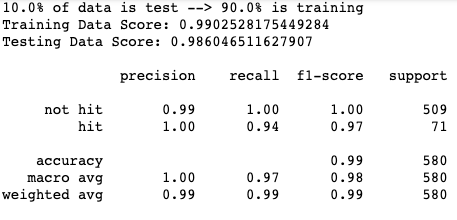

In [18]:
Image(filename='../../images/10test.png', width=500, height=500)

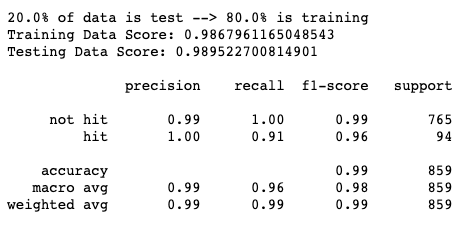

In [10]:
Image(filename='../../images/20test.png', width=500, height=500)

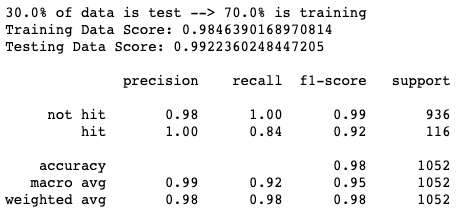

In [8]:
Image(filename='../../images/30test.png', width=500, height=500)

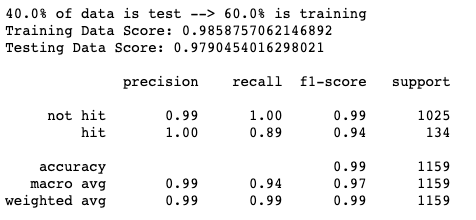

In [11]:
Image(filename='../../images/40test.png', width=500, height=500)

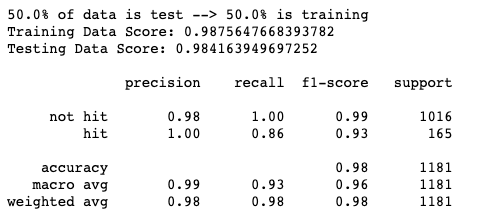

In [12]:
Image(filename='../../images/50test.png', width=500, height=500)

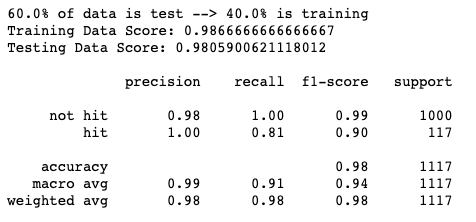

In [13]:
Image(filename='../../images/60test.png', width=500, height=500)

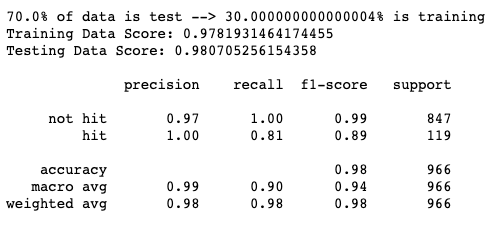

In [14]:
Image(filename='../../images/70test.png', width=500, height=500)

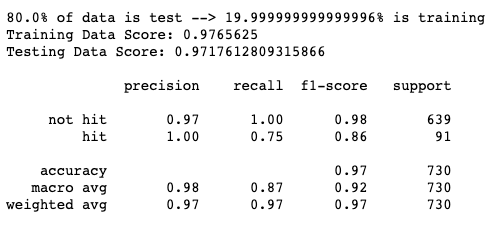

In [15]:
Image(filename='../../images/80test.png', width=500, height=500)

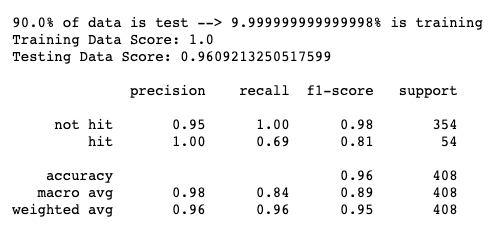

In [16]:
Image(filename='../../images/90test.png', width=500, height=500)

10.0% of data is test --> 90.0% is training
Training Data Score: 0.9902528175449284
Testing Data Score: 0.986046511627907 
              precision    recall  f1-score   support
     not hit       0.99      1.00      1.00       509
         hit       1.00      0.94      0.97        71
    accuracy                           0.99       580
   macro avg       1.00      0.97      0.98       580
weighted avg       0.99      0.99      0.99       580
/--------------------------------------------------------------
20.0% of data is test --> 80.0% is training
Training Data Score: 0.9867961165048543
Testing Data Score: 0.989522700814901 
              precision    recall  f1-score   support
     not hit       0.99      1.00      0.99       765
         hit       1.00      0.91      0.96        94
    accuracy                           0.99       859
   macro avg       0.99      0.96      0.98       859
weighted avg       0.99      0.99      0.99       859 
/--------------------------------------------------------------
30.0% of data is test --> 70.0% is training
Training Data Score: 0.9846390168970814
Testing Data Score: 0.9922360248447205 
              precision    recall  f1-score   support
     not hit       0.98      1.00      0.99       936
         hit       1.00      0.84      0.92       116
    accuracy                           0.98      1052
   macro avg       0.99      0.92      0.95      1052
weighted avg       0.98      0.98      0.98      1052

/--------------------------------------------------------------
40.0% of data is test --> 60.0% is training
Training Data Score: 0.9858757062146892
Testing Data Score: 0.9790454016298021 
              precision    recall  f1-score   support
     not hit       0.99      1.00      0.99      1025
         hit       1.00      0.89      0.94       134
    accuracy                           0.99      1159
   macro avg       0.99      0.94      0.97      1159
weighted avg       0.99      0.99      0.99      1159
/--------------------------------------------------------------
50.0% of data is test --> 50.0% is training
Training Data Score: 0.9875647668393782
Testing Data Score: 0.984163949697252 
              precision    recall  f1-score   support
     not hit       0.98      1.00      0.99      1016
         hit       1.00      0.86      0.93       165
    accuracy                           0.98      1181
   macro avg       0.99      0.93      0.96      1181
weighted avg       0.98      0.98      0.98      1181
/--------------------------------------------------------------
60.0% of data is test --> 40.0% is training
Training Data Score: 0.9866666666666667
Testing Data Score: 0.9805900621118012 
              precision    recall  f1-score   support
     not hit       0.98      1.00      0.99      1000
         hit       1.00      0.81      0.90       117
    accuracy                           0.98      1117
   macro avg       0.99      0.91      0.94      1117
weighted avg       0.98      0.98      0.98      1117

70.0% of data is test --> 30.000000000000004% is training
Training Data Score: 0.9781931464174455
Testing Data Score: 0.980705256154358 
              precision    recall  f1-score   support
     not hit       0.97      1.00      0.99       847
         hit       1.00      0.81      0.89       119
    accuracy                           0.98       966
   macro avg       0.99      0.90      0.94       966
weighted avg       0.98      0.98      0.98       966
/--------------------------------------------------------------
80.0% of data is test --> 19.999999999999996% is training
Training Data Score: 0.9765625
Testing Data Score: 0.9717612809315866 
              precision    recall  f1-score   support
     not hit       0.97      1.00      0.98       639
         hit       1.00      0.75      0.86        91
    accuracy                           0.97       730
   macro avg       0.98      0.87      0.92       730
weighted avg       0.97      0.97      0.97       730
/-------------------------------------------------------------- 
90.0% of data is test --> 9.999999999999998% is training
Training Data Score: 1.0
Testing Data Score: 0.9609213250517599 
              precision    recall  f1-score   support
     not hit       0.95      1.00      0.98       354
         hit       1.00      0.69      0.81        54
    accuracy                           0.96       408
   macro avg       0.98      0.84      0.89       408
weighted avg       0.96      0.96      0.95       408

In [47]:
score_df = pd.DataFrame(scores)

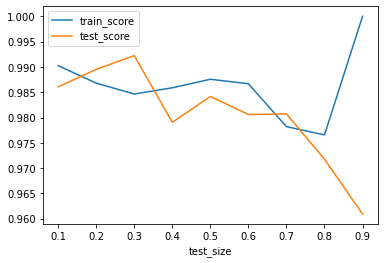

In [48]:
score_df.plot.line(x='test_size');

In [62]:
# X = bb_feature_num.loc[:, bb_feature_num.columns != 'hitTF_x'].values
# y = bb_feature_num['hitTF_x'].values

In [28]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [29]:
# # Scale your data
# from sklearn.preprocessing import MinMaxScaler

# X_scaler = MinMaxScaler().fit(X_train)

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# X_val_scaled = X_scaler.transform(X_val)

In [30]:
# from sklearn.linear_model import LogisticRegression
# LogReg = LogisticRegression()

In [31]:
# import time

In [23]:
# t = time.time()
# LogReg.fit(X_train_scaled, y_train)
# time.time() - t

In [24]:
# print(f"Training Data Score: {LogReg.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {LogReg.score(X_test_scaled, y_test)}")

In [25]:
# predictions = LogReg.predict(X_val_scaled)
# for i, pred in enumerate(predictions):
#     print("Classes are either 0 (not hit) or 1 (is hit)")
#     print(f"The new point was classified as: {pred}")
#     print(f'actual: {y_val[i]}', '\n')

In [26]:
# from sklearn.metrics import classification_report

# print(classification_report(y_val, predictions, target_names=['not hit','hit']))

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = bb_feature_num.loc[:, bb_feature_num.columns != 'hitTF_x'].values
y = bb_feature_num['hitTF_x'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

# Scale your data
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_val_scaled = X_scaler.transform(X_val)

### SVM Model

In [32]:
from sklearn.svm import SVC 
SVM = SVC(kernel='linear')
SVM.fit(X_train_scaled, y_train);

In [33]:
svm_predictions = SVM.predict(X_test_scaled)

In [34]:
print(classification_report(y_test, svm_predictions, target_names=['not hit','hit']))

              precision    recall  f1-score   support

     not hit       0.99      1.00      1.00      3023
         hit       1.00      0.94      0.97       412

    accuracy                           0.99      3435
   macro avg       1.00      0.97      0.98      3435
weighted avg       0.99      0.99      0.99      3435



In [35]:
svm_predictions = SVM.predict(X_val_scaled)
print(classification_report(y_val, svm_predictions, target_names=['not hit','hit']))

              precision    recall  f1-score   support

     not hit       0.99      1.00      0.99       193
         hit       1.00      0.91      0.95        22

    accuracy                           0.99       215
   macro avg       0.99      0.95      0.97       215
weighted avg       0.99      0.99      0.99       215



### Random Forest Model for Scoring the Model

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier(n_estimators=200)

In [38]:
rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.9976710334788937

In [39]:
importances = rf.feature_importances_
importances

array([7.50313040e-04, 1.30465299e-03, 4.59181107e-04, 7.15925078e-04,
       2.35173116e-05, 7.56112514e-04, 4.07137443e-04, 3.35024390e-04,
       6.38674915e-04, 2.34858726e-05, 4.92469700e-04, 7.68010263e-04,
       6.51024075e-09, 1.32678071e-01, 2.36895844e-03, 6.06912585e-02,
       8.20140383e-02, 1.83535875e-01, 1.55365100e-03, 9.13513774e-02,
       7.29080445e-02, 2.11109031e-01, 3.43595848e-03, 5.12476958e-02,
       1.00431530e-01])

In [40]:
feature_cols = bb_feature_num.loc[:, bb_feature_num.columns != 'hitTF_x'].columns

In [41]:
feature_impt = {
    'feats':feature_cols,
    'importance': importances
}

In [42]:
import matplotlib.pyplot as plt

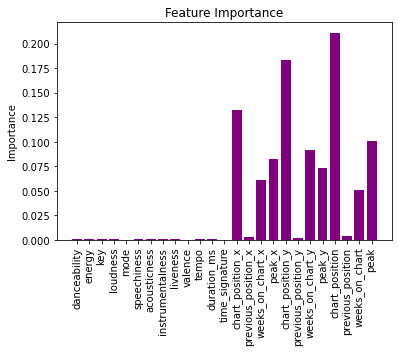

In [44]:
plt.bar(x=feature_impt['feats'], height=feature_impt['importance'], color='purple')
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.ylabel('Importance');

### Questions?